In [108]:
!pip3 install essentia

In [109]:
!pip3 install madmom

In [110]:
!pip3 install mir_eval

The section below is all path dependent

In [111]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [112]:
import madmom

In [113]:
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [114]:
import mir_eval
from mir_eval import *

In [115]:
statsPath = 'drive/MyDrive/Bass/data/yellow/StudentStatistics_yellow.csv'
statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [116]:
index = df_all.index
number_of_rows = len(index)


In [117]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
print("Student 0 is the reference")
while k<number_of_rows:
   sdeviatePath = 'drive/MyDrive/Bass/data/yellow/yellow_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   k+=1

Student 0 is the reference


In [118]:
import csv  
def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
  header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
		 "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]

  studentStatisticsArray= []
  idx = df.index
  number_of_rows = len(idx)

  studentStatistics = []
  onset_X = []  # Martis mark
  onset_amean = []
  onset_mean = []
  onset_std= []

  duration_X = [] # Martis mark
  duration_amean = []
  duration_mean = []
  duration_std= []
  list0 = df["onsetMark"].tolist()  
  list1 = df[" DurationMark"].tolist()  
  list2 = df[" articulationMark "].tolist()  
  list3 = df["soundQualityMark"].tolist()  
  list4 = df["volumeControlMark"].tolist()  
  list5 = df[" finalMark"].tolist()  

  listp = df["precision"].tolist()  
  listr = df["recall"].tolist()  
  listf = df["f_measure_value"].tolist()  
 
  k=0

  for k in range(number_of_rows):
    print("===================================")
    studentStatistics.append(str(k+1))
    student_stats1 = [] # onsets
    student_stats2 = [] # durations

    plt.subplot(2,2,1)
    a = np.array(deviationsArray1[k])
    onset_m, onset_s = mean(a), sqrt(mean(a*a))
    onset_am= mean(abs(a))
    onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Std. Dev. from 0:%f" %(onset_am,onset_m, onset_s)
    title =   "Student " + str(k)+ title_text1

    onset_X.append( list0[k])  # Martis mark

    onset_mean.append(onset_m)
    onset_amean.append(onset_am)
    onset_std.append(onset_s)

    plt.title(title)
    plt.figure(1, figsize=(9.5, 6))
    plt.hist(a)

    plt.subplot(2,2,2)
    a = np.array(deviationsArray2[k])
    duration_m, duration_s = mean(a), sqrt(mean(a*a))
    duration_am= mean(abs(a))
    duration_summary= "Offset Mean: %f, Std. Dev. from 0:%f" %(duration_m, duration_s)
    title =   "Student " + str(k)+ title_text2
    duration_X.append( list1[k])  # Martis mark
    duration_mean.append(duration_m)
    duration_amean.append(duration_am)
    duration_std.append(duration_s)

    plt.title(title)
    plt.figure(1, figsize=(9.5, 6))
    plt.hist(a)

    plt.show()
    print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
    print(onset_summary)
    print(duration_summary)
    print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k], "Volume Control Grade = ", list4[k])
    print("Final Mark = ", list5[k])
    studentStatistics = []
    studentStatistics.append(str(k+1))
    studentStatistics.append(round(listp[k],3))
    studentStatistics.append(round(listr[k],3))
    studentStatistics.append(round(listf[k],3))
    print("F-measure = ", round(listf[k],3))
    studentStatistics.append(round(onset_am,3))
    studentStatistics.append(round(onset_m,3))
    studentStatistics.append(round(onset_s,3))   
    studentStatistics.append(round(duration_am,3))                   
    studentStatistics.append(round(duration_m,3)) 
    studentStatistics.append(round(duration_s,3))   
    studentStatistics.append(list0[k])
    studentStatistics.append(list1[k])
    studentStatistics.append(list2[k])
    studentStatistics.append(list3[k])
    studentStatistics.append(list4[k])
    studentStatistics.append(list5[k])
	  # write the data
	  #writer.writerow(studentStatistics)
    studentStatisticsArray.append(studentStatistics)
    
  return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade

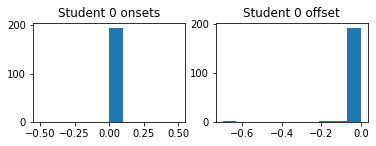

Onset Grade =  100.0 	 Duration Grade =  100.0
Onset ABS  Mean: 0.000000,Onset Mean: 0.000000, Std. Dev. from 0:0.000000
Offset Mean: -0.004949, Std. Dev. from 0:0.051923
Articulation Grade =  100.0 Sound Control Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
F-measure =  0.992


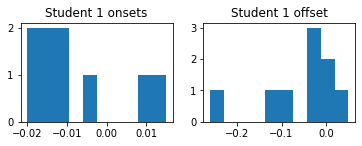

Onset Grade =  49.5 	 Duration Grade =  76.5
Onset ABS  Mean: 0.013333,Onset Mean: -0.007778, Std. Dev. from 0:0.014142
Offset Mean: -0.055556, Std. Dev. from 0:0.101434
Articulation Grade =  49.5 Sound Control Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  1.8
F-measure =  0.045


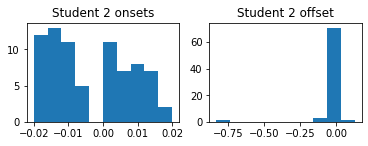

Onset Grade =  76.5 	 Duration Grade =  63.0
Onset ABS  Mean: 0.010921,Onset Mean: -0.004079, Std. Dev. from 0:0.012722
Offset Mean: -0.028618, Std. Dev. from 0:0.101296
Articulation Grade =  76.5 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
F-measure =  0.385


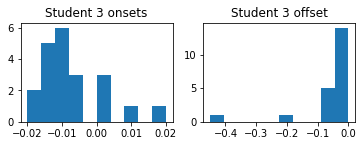

Onset Grade =  49.5 	 Duration Grade =  63.0
Onset ABS  Mean: 0.010476,Onset Mean: -0.007619, Std. Dev. from 0:0.012150
Offset Mean: -0.058571, Std. Dev. from 0:0.111718
Articulation Grade =  63.0 Sound Control Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  2.7
F-measure =  0.105


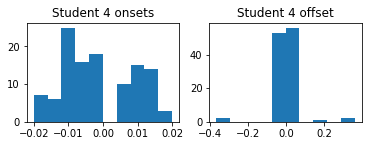

Onset Grade =  76.5 	 Duration Grade =  76.5
Onset ABS  Mean: 0.009035,Onset Mean: -0.000789, Std. Dev. from 0:0.010740
Offset Mean: 0.000439, Std. Dev. from 0:0.069981
Articulation Grade =  76.5 Sound Control Grade =  76.5 Volume Control Grade =  49.5
Final Mark =  1.8
F-measure =  0.589


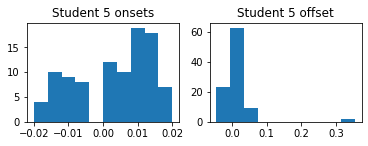

Onset Grade =  90.0 	 Duration Grade =  90.0
Onset ABS  Mean: 0.010412,Onset Mean: 0.002990, Std. Dev. from 0:0.011992
Offset Mean: 0.014845, Std. Dev. from 0:0.055124
Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
F-measure =  0.503


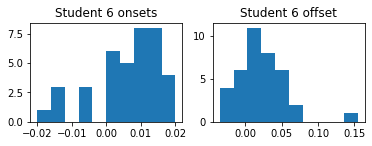

Onset Grade =  76.5 	 Duration Grade =  63.0
Onset ABS  Mean: 0.010132,Onset Mean: 0.005921, Std. Dev. from 0:0.012003
Offset Mean: 0.022368, Std. Dev. from 0:0.040669
Articulation Grade =  63.0 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
F-measure =  0.196


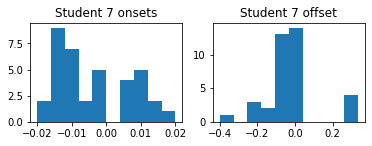

Onset Grade =  76.5 	 Duration Grade =  90.0
Onset ABS  Mean: 0.010135,Onset Mean: -0.003649, Std. Dev. from 0:0.011654
Offset Mean: -0.022027, Std. Dev. from 0:0.144650
Articulation Grade =  90.0 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
F-measure =  0.185


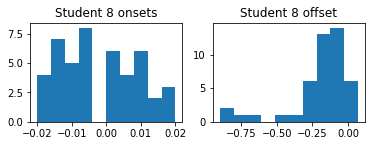

Onset Grade =  49.5 	 Duration Grade =  49.5
Onset ABS  Mean: 0.009889,Onset Mean: -0.002333, Std. Dev. from 0:0.011762
Offset Mean: -0.187111, Std. Dev. from 0:0.286888
Articulation Grade =  76.5 Sound Control Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  1.8
F-measure =  0.16


In [119]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [120]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   




In [121]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [122]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [123]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [124]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/yellow/StudentStatistics_yellow.csv')
header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = dataset[['precision','recall','f_measure_value','Onset Mean']]#,]]
y=array(dataset['onsetMark'])

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:',round( np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))


   Actual  Predicted
0    76.5     60.924
1    76.5     69.761
2    49.5     47.442
Mean Absolute Error: 8.124
Root Mean Squared Error: 9.87


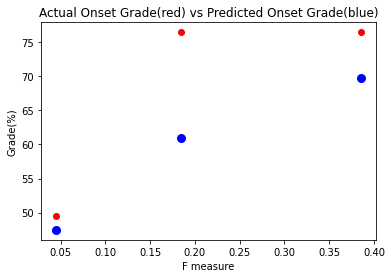

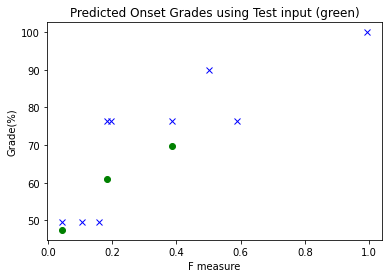

In [126]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_f_measure_value_list = df_all["f_measure_value"].tolist()   
plt.title('Actual Onset Grade(red) vs Predicted Onset Grade(blue)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.scatter(X_test["f_measure_value"].tolist(), y_test,  color='red')
plt.scatter(X_test["f_measure_value"].tolist(), y_pred, color='blue', linewidth=3)
plt.show()

plt.title('Predicted Onset Grades using Test input (green)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.plot(onset_f_measure_value_list,onset_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()


In [127]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['precision','recall','f_measure_value','Duration Mean']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))

print('Mean Absolute Error:',round( metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))


   Actual  Predicted
0    90.0     67.061
1    63.0     76.366
2    76.5     61.687
Mean Absolute Error: 17.039
Root Mean Squared Error: 17.552


[90.  63.  76.5]
[67.06149781 76.36606577 61.68715001]


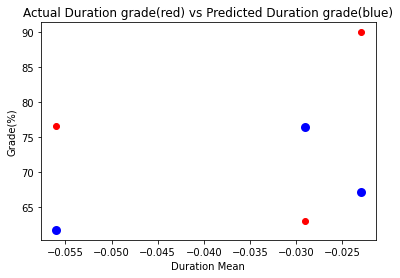

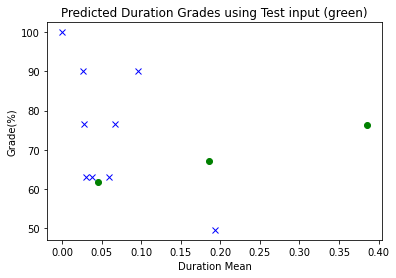

In [128]:
duration_mean_list = df_all["Duration Mean"].tolist()   
#duration_amean_list = df_all["Duration ABS Mean"].tolist()   
duration_grade_list = df_all[" DurationMark"].tolist()   
   
plt.title('Actual Duration grade(red) vs Predicted Duration grade(blue)')
plt.xlabel('Duration Mean')
plt.ylabel('Grade(%)')
plt.scatter(X_test["Duration Mean"].tolist(), y_test,  color='red')
plt.scatter(X_test["Duration Mean"].tolist(), y_pred, color='blue', linewidth=3)
print(y_test)
print(y_pred)
plt.show()

plt.title('Predicted Duration Grades using Test input (green)')
plt.xlabel('Duration Mean')
plt.ylabel('Grade(%)')
plt.plot(duration_amean_list,duration_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()


In [129]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark
0,0,0.985,1.000,0.992,0.000,0.000,0.000,0.000,0.000,0.000,100.0,100.0,100.0,100.0,100.0,5.0
1,1,0.044,0.046,0.045,0.013,-0.008,0.014,0.067,-0.056,0.101,49.5,76.5,49.5,63.0,63.0,1.8
2,2,0.380,0.390,0.385,0.011,-0.004,0.013,0.038,-0.029,0.101,76.5,63.0,76.5,76.5,76.5,3.6
3,3,0.103,0.108,0.105,0.010,-0.008,0.012,0.059,-0.059,0.112,49.5,63.0,63.0,63.0,76.5,2.7
4,4,0.594,0.585,0.589,0.009,-0.001,0.011,0.028,0.000,0.070,76.5,76.5,76.5,76.5,49.5,1.8
5,5,0.508,0.497,0.503,0.010,0.003,0.012,0.026,0.015,0.056,90.0,90.0,90.0,90.0,90.0,4.5
6,6,0.198,0.195,0.196,0.010,0.006,0.012,0.030,0.022,0.041,76.5,63.0,63.0,76.5,76.5,3.6
7,7,0.181,0.190,0.185,0.010,-0.004,0.012,0.096,-0.023,0.147,76.5,90.0,90.0,76.5,76.5,3.6
8,8,0.122,0.231,0.160,0.010,-0.002,0.012,0.193,-0.187,0.287,49.5,49.5,76.5,63.0,63.0,1.8


In [130]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0     3.6  -0.265812
1     3.6  13.608101
2     1.8   6.140306
Mean Absolute Error: 6.071406306038938
Root Mean Squared Error: 6.681936826144514
